In [1]:
import sys
sys.version

'3.9.1 (default, Dec 11 2020, 09:29:25) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import yfinance as yf
yf.pdr_override()
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing

In [3]:
stocks = yf.download("VTI SPY VOO VXUS BND SBUX MSFT AAPL AMD CVNA", start="2010-12-31", end="2021-01-29")

[*********************100%***********************]  10 of 10 completed


In [7]:
adj_close = stocks['Adj Close']
adj_close.head()

,AAPL,AMD,BND,CVNA,MSFT,SBUX,SPY,VOO,VTI,VXUS
Date,,,,,,,,,,
2010-12-31,9.937733,8.18,60.893539,NaN,22.190401,13.611482,103.053917,94.675804,53.566647,NaN
2011-01-03,10.153707,8.47,60.817699,NaN,22.246056,14.085956,104.119293,95.563873,54.119396,NaN
2011-01-04,10.206698,8.77,60.825283,NaN,22.333513,13.759750,104.061905,95.481636,54.012138,NaN
2011-01-05,10.290187,8.91,60.559765,NaN,22.261955,13.704682,104.602806,95.991425,54.309158,NaN
2011-01-06,10.281872,8.69,60.612873,NaN,22.913908,13.539465,104.397934,95.826988,54.185398,NaN


<AxesSubplot:xlabel='Date'>

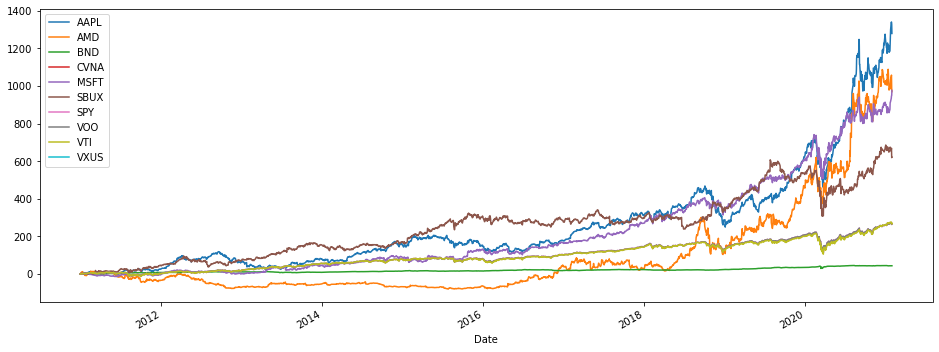

In [9]:
for symbol in adj_close:
    adj_close[symbol] = (adj_close[symbol]/adj_close[symbol].iloc[0] - 1) * 100

adj_close.plot(figsize=(16,6))

In [10]:
import plotly.express as px 

# Loading the iris dataset 
melted = pd.melt(adj_close, ignore_index = False)

fig = px.line(melted,y="value",  
              color="variable") 
fig.show()